In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [3]:
student_performance = pd.read_csv('/Users/arun/Downloads/Student_Performance.csv')

In [4]:
student_performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
student_performance.shape

(10000, 6)

In [6]:
student_performance.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [7]:
student_performance.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
student_performance.groupby('Extracurricular Activities')['Performance Index'].mean()

Extracurricular Activities
No     54.758511
Yes    55.700889
Name: Performance Index, dtype: float64

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

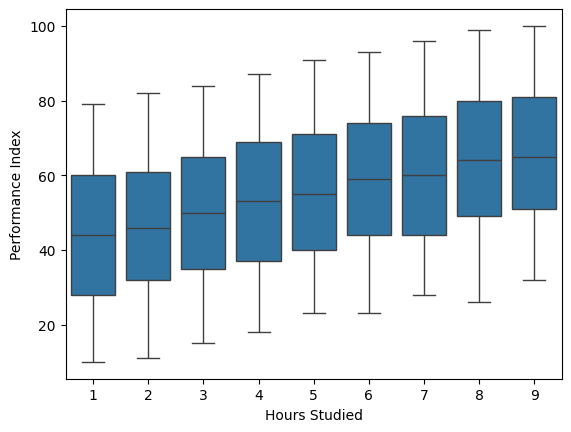

In [9]:
sns.boxplot(x = 'Hours Studied', y = 'Performance Index', data = student_performance)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

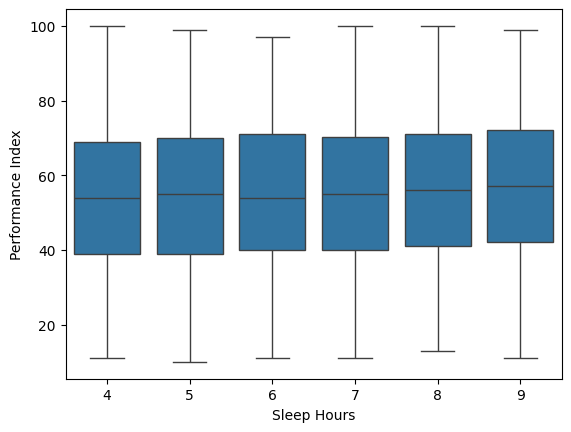

In [10]:
sns.boxplot(x = 'Sleep Hours', y = 'Performance Index', data = student_performance)

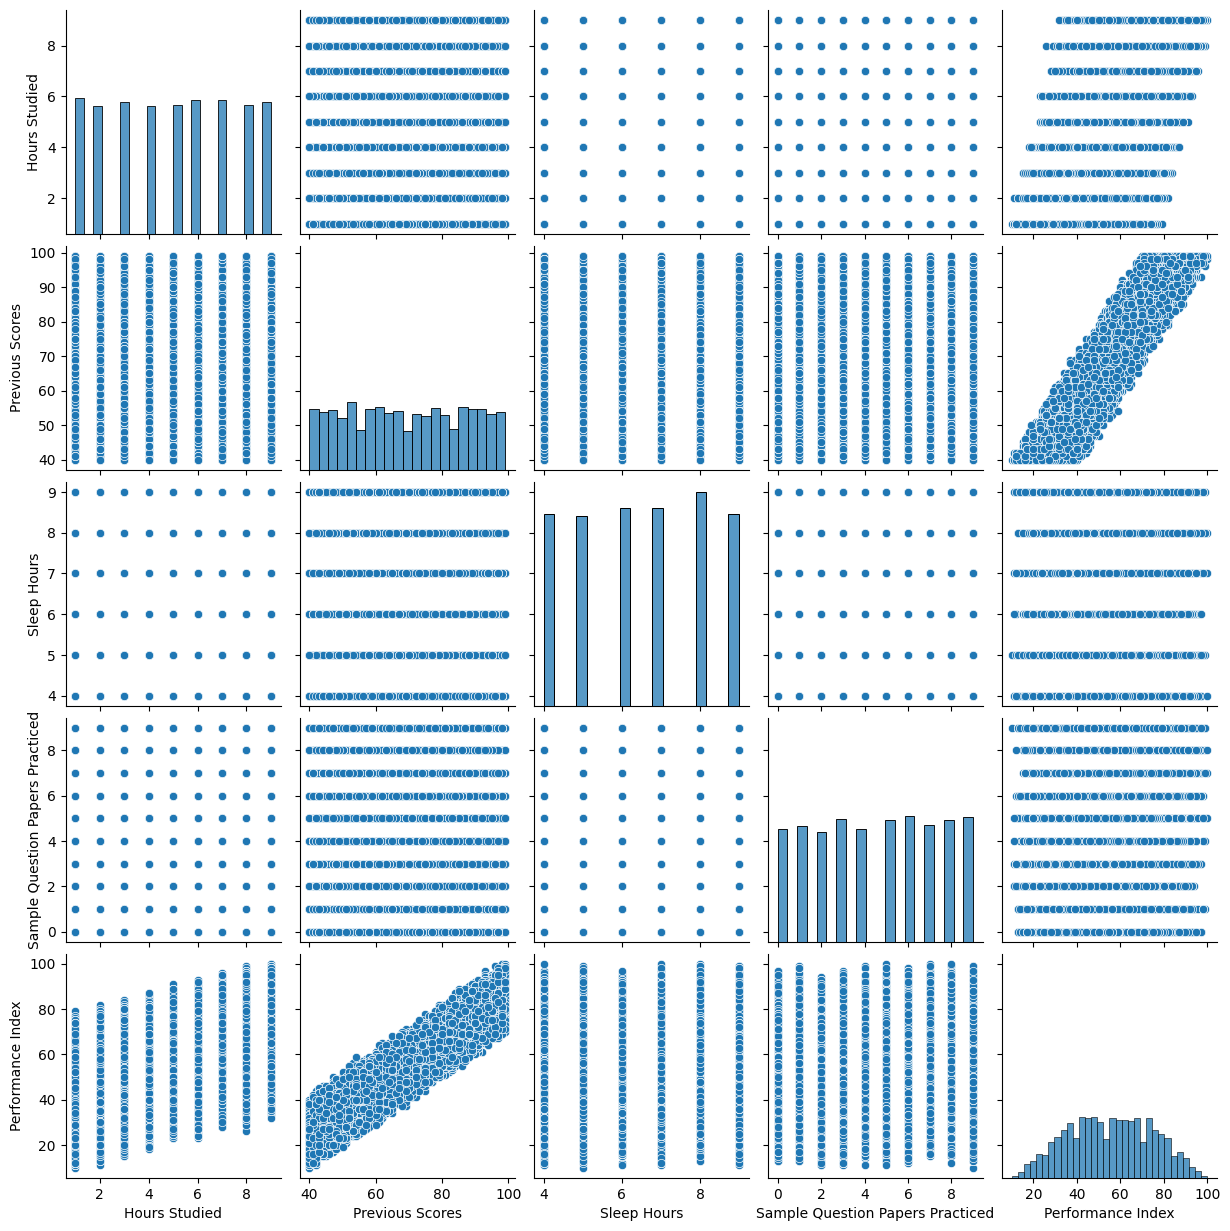

In [11]:
sns.pairplot(student_performance)

In [12]:
#ols function doesn't do well when column contains spaces
student_performance = student_performance.rename(columns={'Hours Studied' : 'hours_studied',
                                                          'Previous Scores' : 'previous_scores',
                                                          'Extracurricular Activities' : 'extracurricular_activities',
                                                          'Performance Index' : 'performance_index'})

In [13]:
#Multiple Linear regression model using OLS
ols_formula = 'performance_index ~ hours_studied + C(extracurricular_activities) + previous_scores'
OLS = ols(formula= ols_formula,data= student_performance)
model = OLS.fit()

In [14]:
model_results = model.summary()

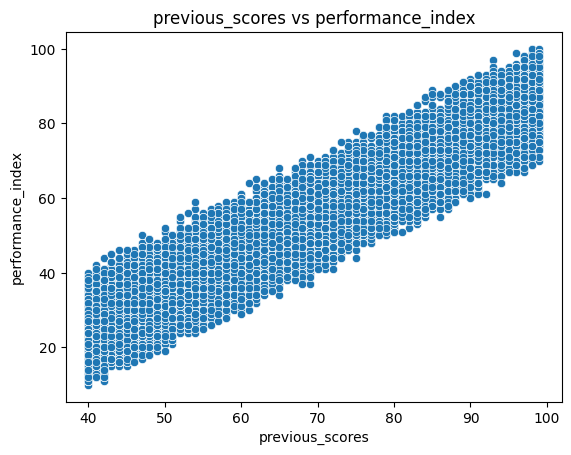

In [15]:
#check for model assumptions

#Linearity with the independent continuos variable
fig = sns.scatterplot(x = student_performance['previous_scores'], y = student_performance['performance_index'])
fig.set_title('previous_scores vs performance_index')
plt.show()

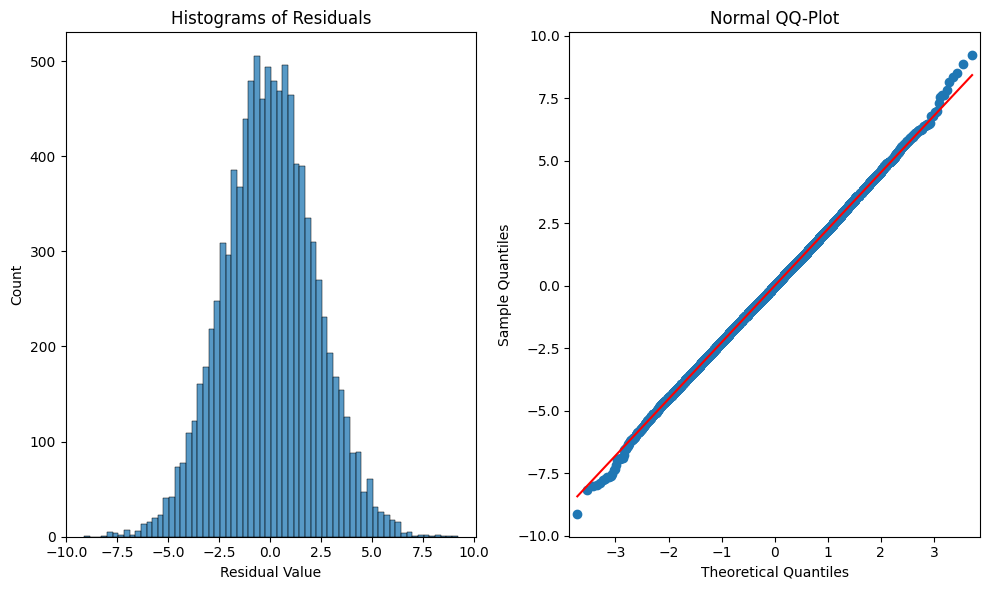

In [16]:
residuals = model.resid
fig, axes = plt.subplots(1,2, figsize = (10,6))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title('Histograms of Residuals')

sm.qqplot(residuals, line = 's', ax=axes[1])
axes[1].set_title('Normal QQ-Plot')

plt.tight_layout()

plt.show()

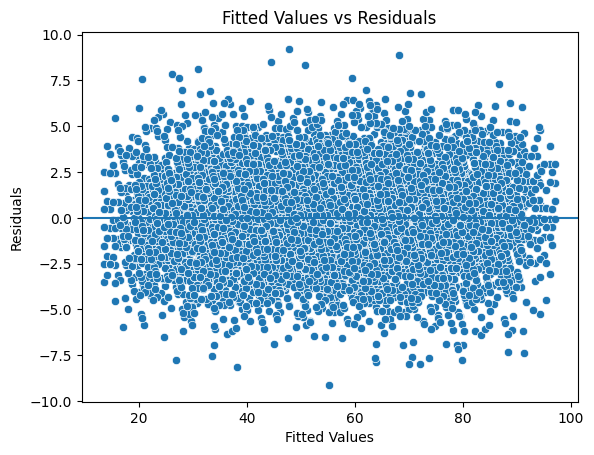

In [17]:
fig = sns.scatterplot(x = model.fittedvalues, y = residuals)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Fitted Values vs Residuals')
fig.axhline(0)
plt.show()

In [18]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      performance_index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.365e+05
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:49:40   Log-Likelihood:                -22362.
No. Observations:               10000   AIC:                         4.473e+04
Df Residuals:                    9996   BIC:                         4.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -30.0962      0.106   -284.295      0.000     -30.304     -29.889
C(extracurricular_activities)[T.Yes]     0.5893      0.045     13.008      0.000       0.500       0.678
hours_studied                            2.8572      0.009    326.606      0.000       2.840       2.874
previous_scores                          1.0190      0.001    780.160      0.000       1.016       1.022
==============================================================================
Omnibus:                        4.810   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.066
Skew:                           0.020   Prob(JB):                       0.0794
Kurtosis:                       3.103   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#One-way Anova test
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(extracurricular_activities),8.679193e+02,1.0,169.200134,2.264609e-38
hours_studied,5.471764e+05,1.0,106671.574757,0.000000e+00
previous_scores,3.122096e+06,1.0,608650.005400,0.000000e+00
Residual,5.127491e+04,9996.0,NaN,NaN


In [21]:
#Tukey's HSD post hoc test
tukey_oneway = pairwise_tukeyhsd(endog = student_performance['performance_index'], groups = student_performance['hours_studied'])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,2.3123,0.0555,-0.0269,4.6514,False
1,3,5.6603,0.0,3.3395,7.981,True
1,4,8.6035,0.0,6.2644,10.9426,True
1,5,11.4001,0.0,9.066,13.7343,True
1,6,14.37,0.0,12.0565,16.6835,True
1,7,16.1175,0.0,13.802,18.433,True
1,8,20.0951,0.0,17.7576,22.4325,True
1,9,21.6092,0.0,19.2864,23.9321,True
2,3,3.348,0.0004,0.9922,5.7038,True
2,4,6.2912,0.0,3.9174,8.6651,True
